# Plot accuracies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import jsonlines

def load_jsonlines(file_path):
    data = []
    with jsonlines.open(file_path) as reader:
        for obj in reader:
            data.append(obj)
    return data

def plot_accuracies(data, rows, names=None, wrap_width=10):
    # Extract accuracies based on provided row indices
    accuracies = [data[row]["accuracy"] for row in rows]
    
    # Get names for bars
    if names is None:
        names = []
        for row in rows:
            names.append(data[row]["name"])
    
    # Extract task
    task = data[rows[0]]["task"]        
    
    # Wrap text for x-axis labels
    wrapped_names = [textwrap.fill(name, wrap_width) for name in names]
    
    # Use seaborn color palette
    colors = sns.color_palette("husl", len(rows))

    # Plot the data with seaborn style
    plt.style.use('seaborn-v0_8-dark')
    plt.figure(figsize=(12, 8))
    
    bars = plt.bar(wrapped_names, accuracies, color=colors)
    
    # Add grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    
    # Add labels and title
    plt.xlabel('Type of Training', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title(f'Accuracies (task: {task})', fontsize=16, pad=20)  # Adjust pad to increase space above title
    plt.ylim(0, 1)

    # Adjust top margin to add space above the graph
    plt.subplots_adjust(top=0.85)
    
    # Add data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=12)

    # Add legend outside the plot
    plt.legend(bars, names, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    
    # Show the plot
    plt.show()

def plot_sub_task_accuracies(data, row, wrap_width=10):
    # Extract sub_tasks and their accuracies
    sub_tasks = data[row]["sub_tasks"]
    accuracies = [sub_task["accuracy"] for sub_task in sub_tasks]
    
    # Extract task, sub_task names, frac_of_data, model name, overall acc
    task = data[row]["task"]
    sub_task_names = [sub_task["name"] for sub_task in sub_tasks]
    try:
        frac_of_data = [sub_task["frac_of_data"] for sub_task in sub_tasks]
    except:
        frac_of_data = [1.0 for sub_task in sub_tasks]
    name = "Not Specified"
    if "name" in data[row]:
        name = data[row]["name"]
    overall_acc = data[row]["accuracy"]
    
    # Wrap text for x-axis labels
    wrapped_names = [textwrap.fill(name, wrap_width) for name in sub_task_names]
    
    # Use seaborn color palette
    colors = sns.color_palette("husl", len(sub_tasks))

    # Plot the data with seaborn style
    plt.style.use('seaborn-v0_8-dark')
    plt.figure(figsize=(12, 8))
    
    bars = plt.bar(wrapped_names, accuracies, color=colors)
    
    # Add grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    
    # Add labels and title
    plt.xlabel('Sub-task', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title(f'Sub-Task Accuracies (task: {task}, model: {name}, overall_acc: {overall_acc:.2f})', fontsize=16, pad=20)  # Adjust pad to increase space above title
    plt.ylim(0, 1)

    # Adjust top margin to add space above the graph
    plt.subplots_adjust(top=0.85)
    
    # Add data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=12)

    # Create legend labels with sub_task_name and frac_of_data
    legend_labels = [f'{name} ({frac:.2f})' for name, frac in zip(sub_task_names, frac_of_data)]
    
    # Add legend outside the plot
    plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    
    # Show the plot
    plt.show()

def plot_grouped_sub_task_accuracies(data, rows, wrap_width=10):
    # Extract unique subtask names
    all_sub_task_names = sorted(set(sub_task["name"] for row in rows for sub_task in data[row]["sub_tasks"]))
    
    # Task extraction
    task = data[rows[0]]["task"]
    # Create a color palette for each row
    colors = sns.color_palette("husl", len(rows))

    # Initialize the plot
    plt.style.use('seaborn-v0_8-dark')
    plt.figure(figsize=(14, 8))
    
    bar_width = 0.8 / len(rows)  # Bar width for each row in the group
    x = range(len(all_sub_task_names))  # Positions for subtask groups
    
    for i, row in enumerate(rows):
        sub_tasks = data[row]["sub_tasks"]
        sub_task_names = [sub_task["name"] for sub_task in sub_tasks]
        accuracies = [sub_task["accuracy"] for sub_task in sub_tasks]
        name = data[row].get("name", f"Row {row}")
        overall_acc = data[row]["accuracy"]

        # Map accuracies to the correct position in the grouped bar chart
        y = [accuracies[sub_task_names.index(sub_task)] if sub_task in sub_task_names else 0 for sub_task in all_sub_task_names]
        
        # Plot bars for each subtask group
        bars = plt.bar([pos + i * bar_width for pos in x], y, bar_width, label=f'{name} ({overall_acc:.2f})', color=colors[i])

        # Add data labels on top of bars
        for bar in bars:
            yval = bar.get_height()
            if yval > 0:
                plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)
    
    # Wrap text for x-axis labels
    wrapped_names = [textwrap.fill(name, wrap_width) for name in all_sub_task_names]
    
    # Add labels, title, and legend
    plt.xlabel('Sub-task', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title(f'Grouped Sub-Task Accuracies (Task: {task})', fontsize=16, pad=20)
    plt.xticks([pos + (bar_width * (len(rows) - 1)) / 2 for pos in x], wrapped_names, fontsize=12)
    plt.ylim(0, 1)
    
    # Add grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    
    # Add legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    
    # Adjust the plot layout
    plt.subplots_adjust(right=0.75, top=0.85)
    
    # Show the plot
    plt.show()
    
def plot_gap_between_rows(data, row1, row2, wrap_width=10):
    # Extract unique subtask names
    all_sub_task_names = sorted(set(sub_task["name"] for sub_task in data[row1]["sub_tasks"] + data[row2]["sub_tasks"]))
    
    # Task extraction
    task = data[row1]["task"]
    
    # Get sub-tasks and accuracies for both rows
    sub_tasks1 = data[row1]["sub_tasks"]
    sub_tasks2 = data[row2]["sub_tasks"]
    
    sub_task_names1 = {sub_task["name"]: sub_task["accuracy"] for sub_task in sub_tasks1}
    sub_task_names2 = {sub_task["name"]: sub_task["accuracy"] for sub_task in sub_tasks2}
    
    name1 = data[row1].get("name", f"Row {row1}")
    name2 = data[row2].get("name", f"Row {row2}")
    
    overall_acc1 = data[row1]["accuracy"]
    overall_acc2 = data[row2]["accuracy"]
    
    # Compute the gap between accuracies
    gaps = [(name, sub_task_names1.get(name, 0) - sub_task_names2.get(name, 0)) for name in all_sub_task_names]
    
    # Sort the gaps by the gap value
    gaps_sorted = sorted(gaps, key=lambda x: x[1])
    
    # Unpack the sorted gaps and names
    sorted_names, sorted_gaps = zip(*gaps_sorted)
    
    # Initialize the plot, scaling with the number of tasks
    plt.style.use('seaborn-v0_8-dark')
    plt.figure(figsize=(14, 0.7 * len(sorted_names) + 4))
    
    y = range(len(sorted_names))  # Positions for subtask groups
    
    # Determine colors: green for row2 better, red for row1 better
    colors = ['green' if gap > 0 else 'red' for gap in sorted_gaps]
    
    # Plot horizontal bars for the gap between rows
    bars = plt.barh(y, sorted_gaps, color=colors)
    
    # Add data labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='right' if width < 0 else 'left', fontsize=10)
    
    # Wrap text for y-axis labels
    wrapped_names = [textwrap.fill(name, wrap_width) for name in sorted_names]
    
    # Add labels, title, and customize ticks
    plt.ylabel('Sub-task', fontsize=14)
    plt.xlabel('Accuracy Gap', fontsize=14)
    plt.title(f'Gap in Sub-Task Accuracies (Task: {task})', fontsize=16, pad=20)
    plt.yticks(y, wrapped_names, fontsize=8)
    plt.xlim(-1, 1)
    
    # Add grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    
    # Add legend for the overall accuracies of both rows
    plt.legend([f'{name1} ({overall_acc1:.2f}) vs {name2} ({overall_acc2:.2f})'], loc='upper left', fontsize=12)
    
    # Adjust the plot layout
    plt.subplots_adjust(left=0.25, top=0.85)
    
    # Show the plot
    plt.show()

    # Return the sorted list of (sub-task name, gap)
    return gaps_sorted

def parse_mmmu_results(input_file_path):
    """
    Transforms a JSONL file into a list of JSON objects with 'accuracy' and 'name' attributes.
    
    Args:
        input_file_path (str): Path to the input JSONL file.
    
    Returns:
        list: A list of transformed JSON objects.
    """
    transformed_objects = []
    
    with jsonlines.open(input_file_path) as reader:
        for obj in reader:
            result = obj.get("MMMUMetric_result", {})
            accuracy = result.get("correct", 0)
            name = obj.get("name", "")
            
            transformed_object = {
                "name": name,  
                "accuracy": accuracy,
                "task": "MMMU"
            }
            
            transformed_objects.append(transformed_object)
    
    return transformed_objects

def parse_results(obj, name, task_name):
    """
    Transforms a JSONL file into a list of JSON objects with 'accuracy' and 'name' attributes.
    
    Args:
        input_file_path (str): Path to the input JSONL file.
    
    Returns:
        list: A list of transformed JSON objects.
    """
    result = obj.get(f"{task_name}Metric_result", {})
    accuracy = result.get("correct", 0)
    
    transformed_object = {
        "name": name,  
        "accuracy": accuracy,
        "task": task_name
    }
    
    return transformed_object

import math
def parse_subtask_results(full_results, obj, task_name):
    """
    Transforms a JSONL file into a list of JSON objects with 'accuracy' and 'name' attributes.
    
    Args:
        input_file_path (str): Path to the input JSONL file.
    
    Returns:
        list: A list of transformed JSON objects.
    """
    result = obj.get(f"{task_name}Metric_result", {})
    subtask_results = []
    for key in result.keys():
        accuracy = result[key].get("correct", 0)
        if math.isnan(accuracy):
            continue    
        subtask_results.append({
            "name": key,  
            "accuracy": accuracy,
        })
    full_results["sub_tasks"] = subtask_results
    return full_results

def append_to_jsonl_file(json_objects, output_file_path):
    """
    Appends a list of JSON objects to a JSONL file using the jsonlines package.
    
    Args:
        json_objects (list): A list of JSON objects to append.
        output_file_path (str): Path to the JSONL file.
    """
    with jsonlines.open(output_file_path, mode='a') as writer:
        writer.write_all(json_objects)

# Result Parsing from Eureka

In [3]:
# import os 
# import json

# parsed_results = []
# task_name = "MMMU"
# run_tags = ["0_base_model", "ai2d_3_v3", "ai2d_5_skyline", "chartqa_3_v3", "chartqa_5_skyline"]
# for i in run_tags:
#     dir_path = f"/home/t-sijoshi/LFM-Eval-Understand/logs/MMMU_REPORTING_PIPELINE/llava_{str(i)}/eval_report"
#     for file in os.listdir(dir_path):
#         if "result_normalized" in file:
#             with open(os.path.join(dir_path, file), "r") as f:
#                 data = parse_results(json.load(f), f"llava_{str(i)}", task_name)
#                 parsed_results.append(data)
#                 print(data)
                
# expanded_results = []
# for i, full_results in zip(run_tags, parsed_results):
#     dir_path = f"/home/t-sijoshi/LFM-Eval-Understand/logs/MMMU_REPORTING_PIPELINE/llava_{str(i)}/eval_report"
#     for file in os.listdir(dir_path):
#         if "result_normalized" not in file:
#             try:
#                 with open(os.path.join(dir_path, file), "r") as f:
#                     data = parse_subtask_results(full_results, json.load(f), task_name)
#                     print(data)
#                     expanded_results.append(data)
#             except:
#                 print(file)

In [3]:
# with jsonlines.open("/home/t-sijoshi/multimodal-data-gen/results/summary.jsonl", "a") as f:
#     for res in expanded_results:
#         f.write(res)

# Plotting

In [4]:
results = []
with jsonlines.open("../results/final_results.jsonl", "r") as reader:
    for line in reader:
        results.append(line)

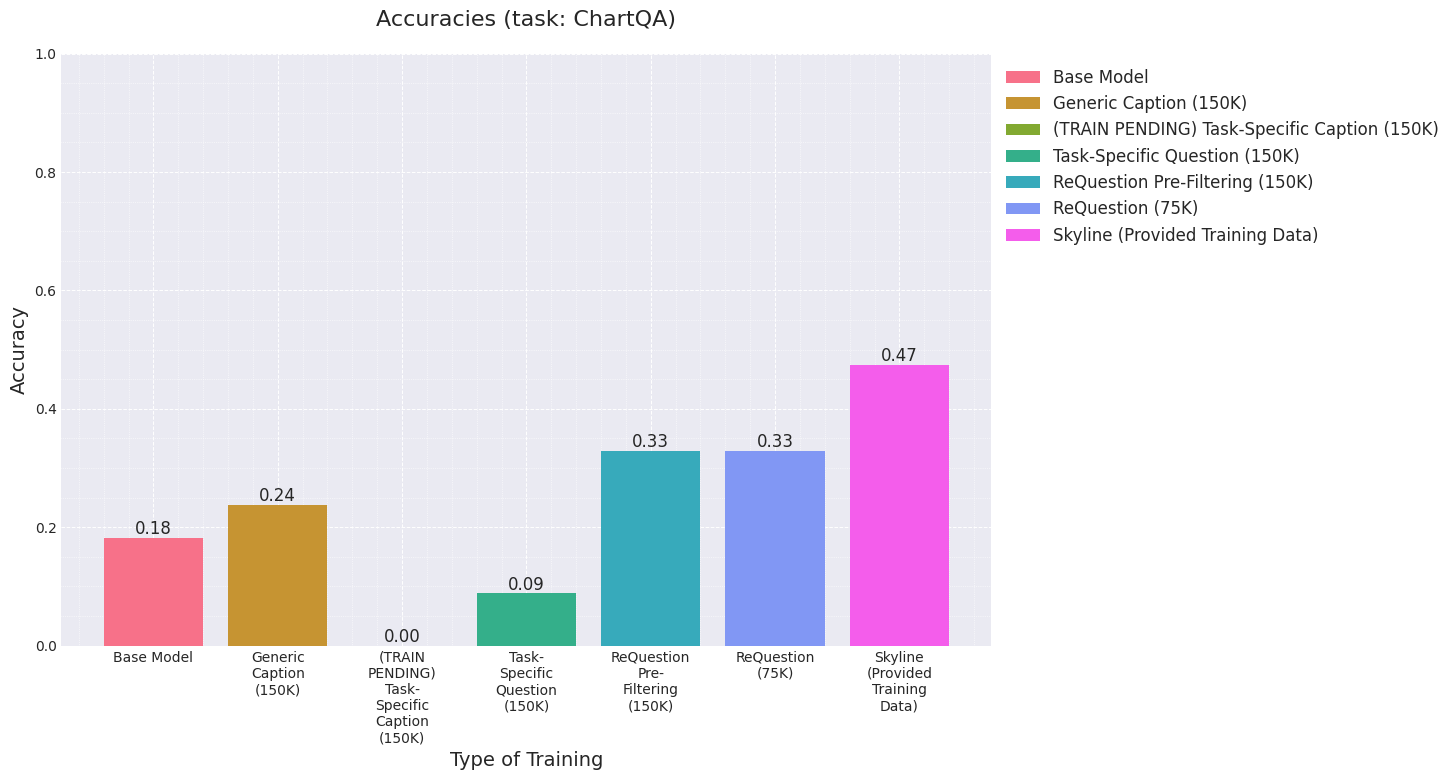

In [10]:
plot_accuracies(results, [0,1,2,3,4,5, 6])

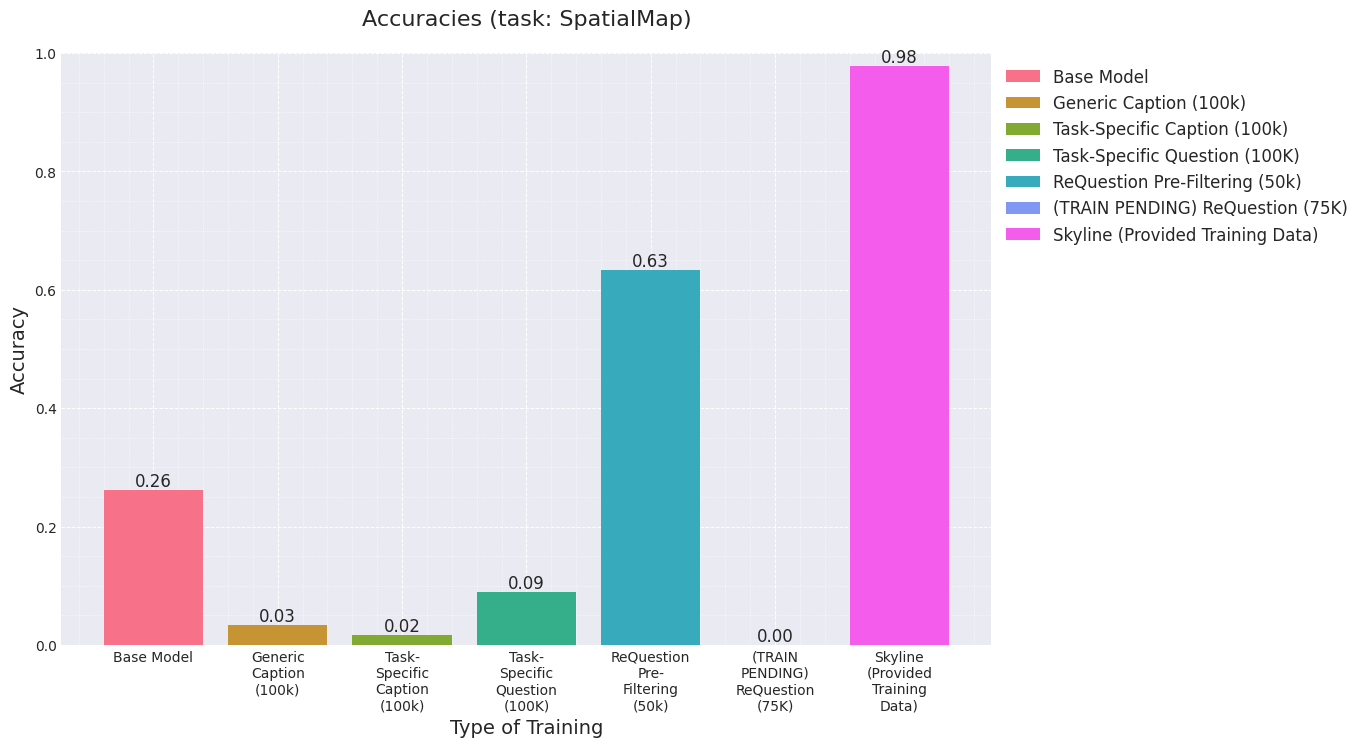

In [11]:
plot_accuracies(results, [x+7 for x in [0,1,2,3,4,5,6]])

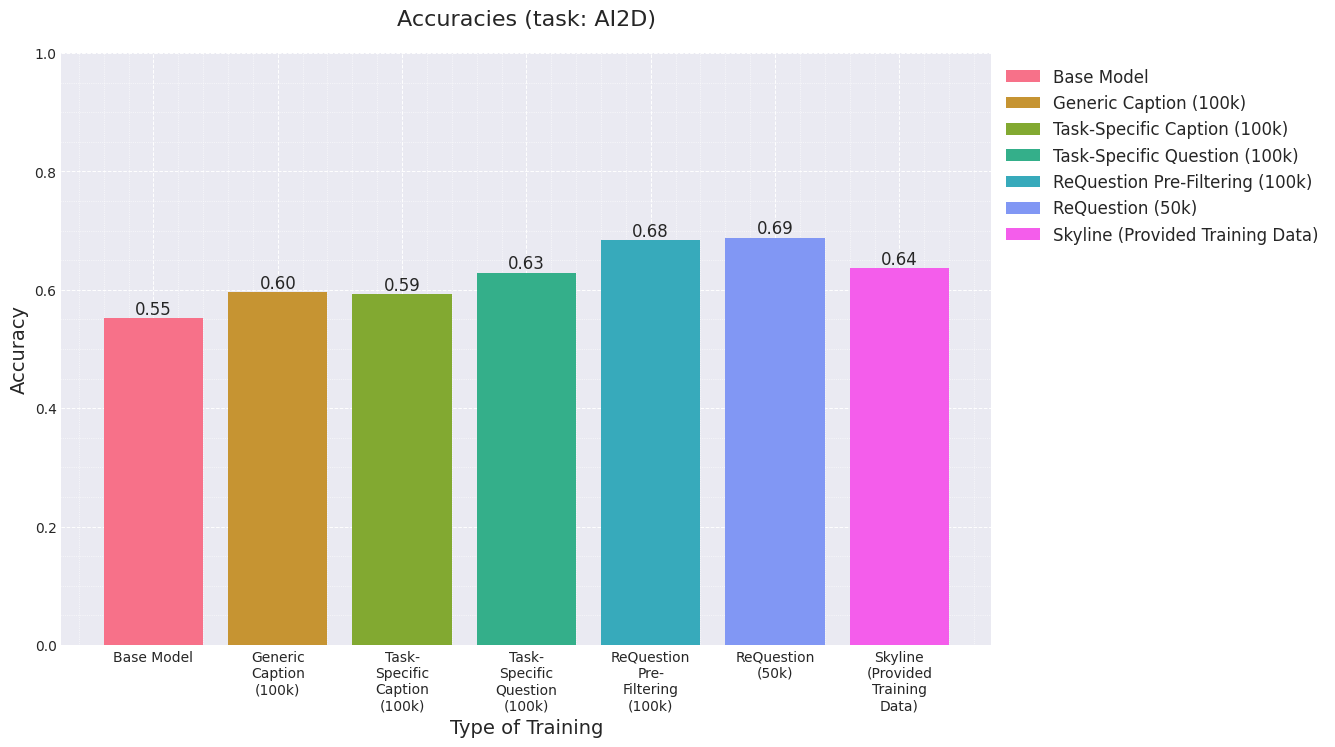

In [5]:
plot_accuracies(results, [x+14 for x in [0,1,2,3,4,5,6]])

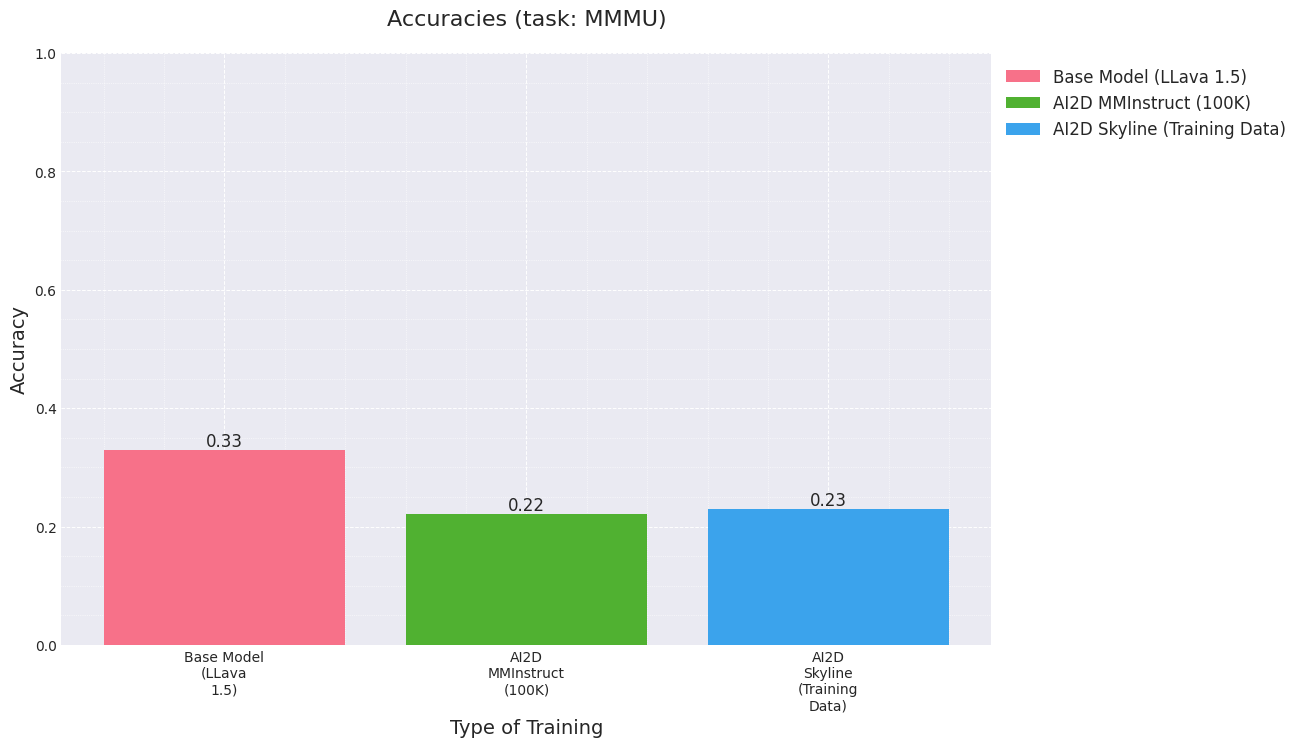

In [27]:
plot_accuracies(results, [121, 122, 123])

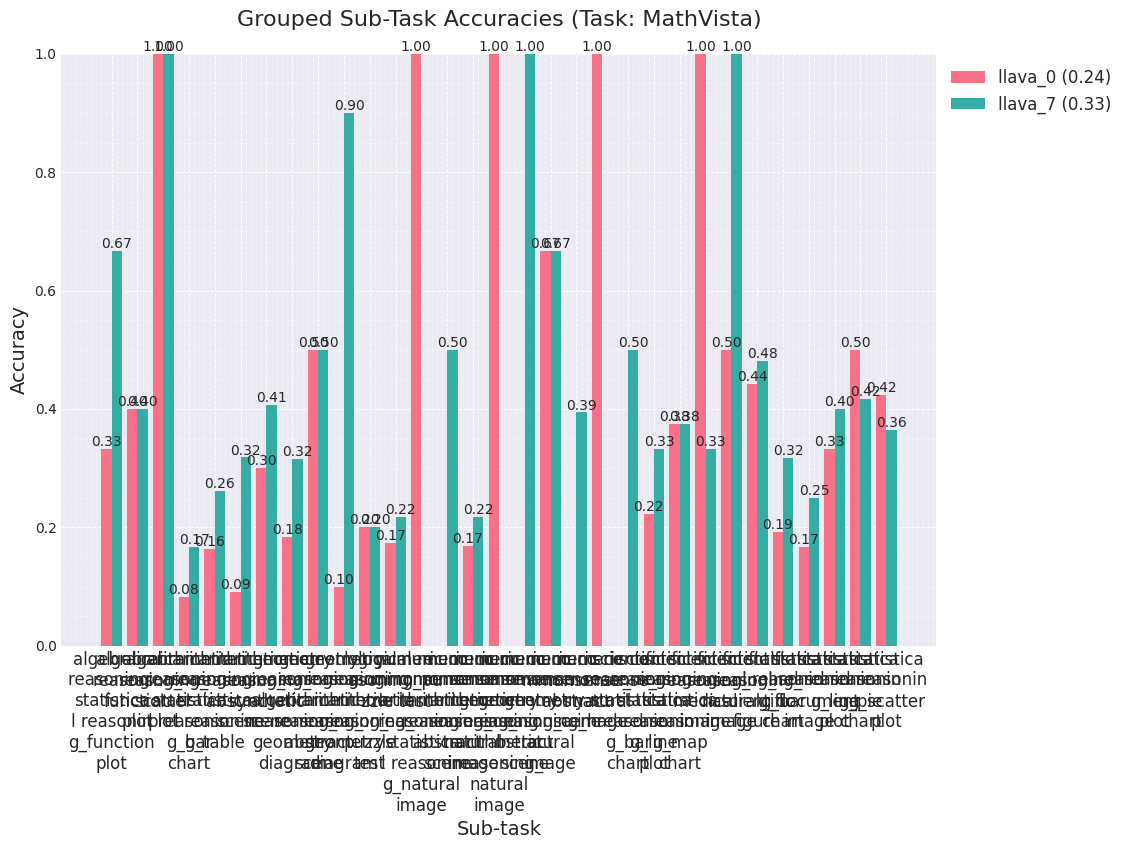

In [22]:
plot_grouped_sub_task_accuracies(results, [87,96])

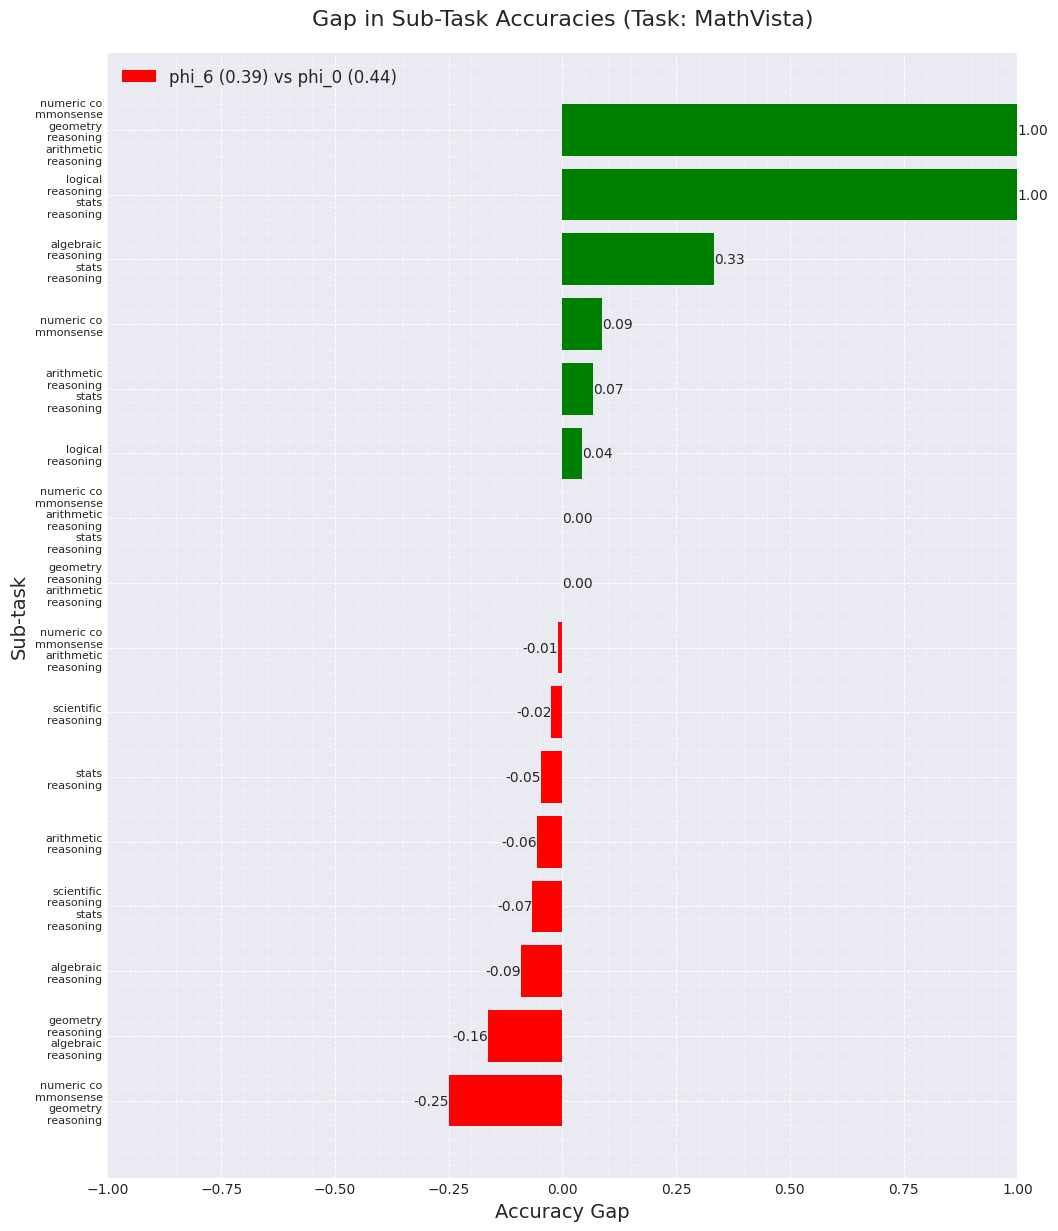

[('numeric commonsense geometry reasoning', -0.25),
 ('geometry reasoning algebraic reasoning', -0.16399999999999998),
 ('algebraic reasoning', -0.09000000000000002),
 ('scientific reasoning stats reasoning', -0.066),
 ('arithmetic reasoning', -0.055999999999999994),
 ('stats reasoning', -0.04800000000000004),
 ('scientific reasoning', -0.02400000000000002),
 ('numeric commonsense arithmetic reasoning', -0.009999999999999981),
 ('geometry reasoning arithmetic reasoning', 0.0),
 ('numeric commonsense arithmetic reasoning stats reasoning', 0.0),
 ('logical reasoning', 0.04300000000000001),
 ('arithmetic reasoning stats reasoning', 0.068),
 ('numeric commonsense', 0.08799999999999997),
 ('algebraic reasoning stats reasoning', 0.33299999999999996),
 ('logical reasoning stats reasoning', 1.0),
 ('numeric commonsense geometry reasoning arithmetic reasoning', 1.0)]

In [52]:
plot_gap_between_rows(results, 72, 60)

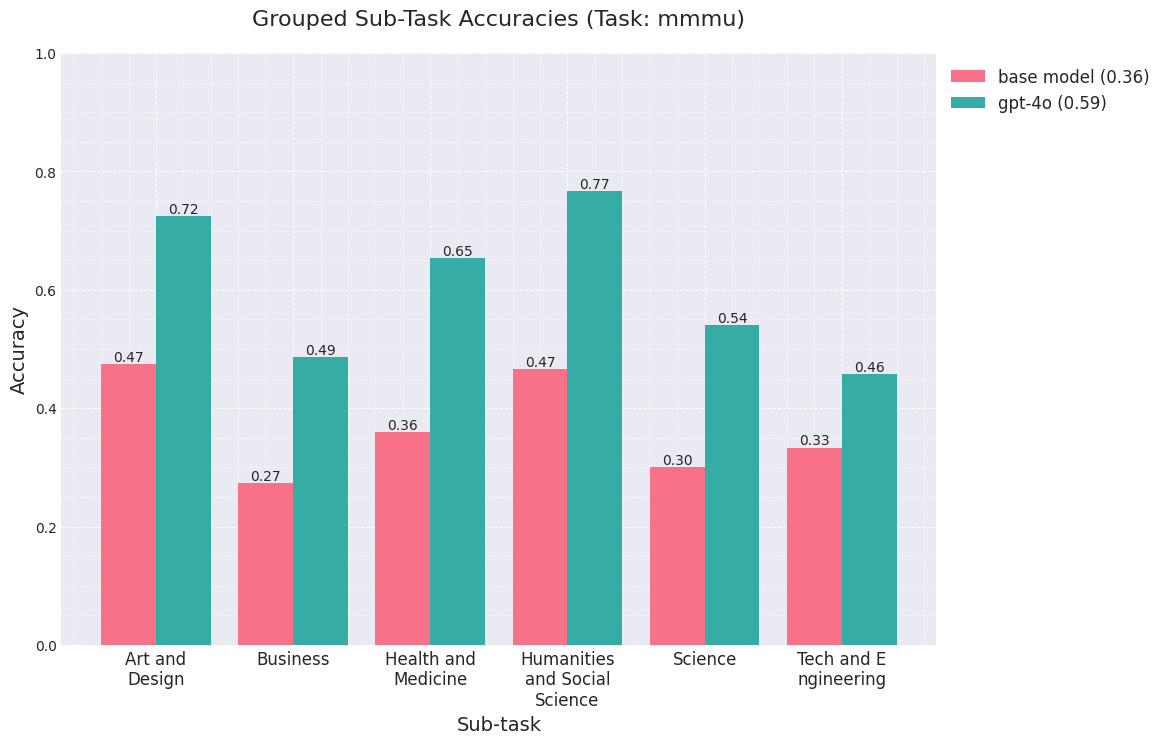

In [37]:
plot_grouped_sub_task_accuracies(results, [49,52, 53, 51, 47])

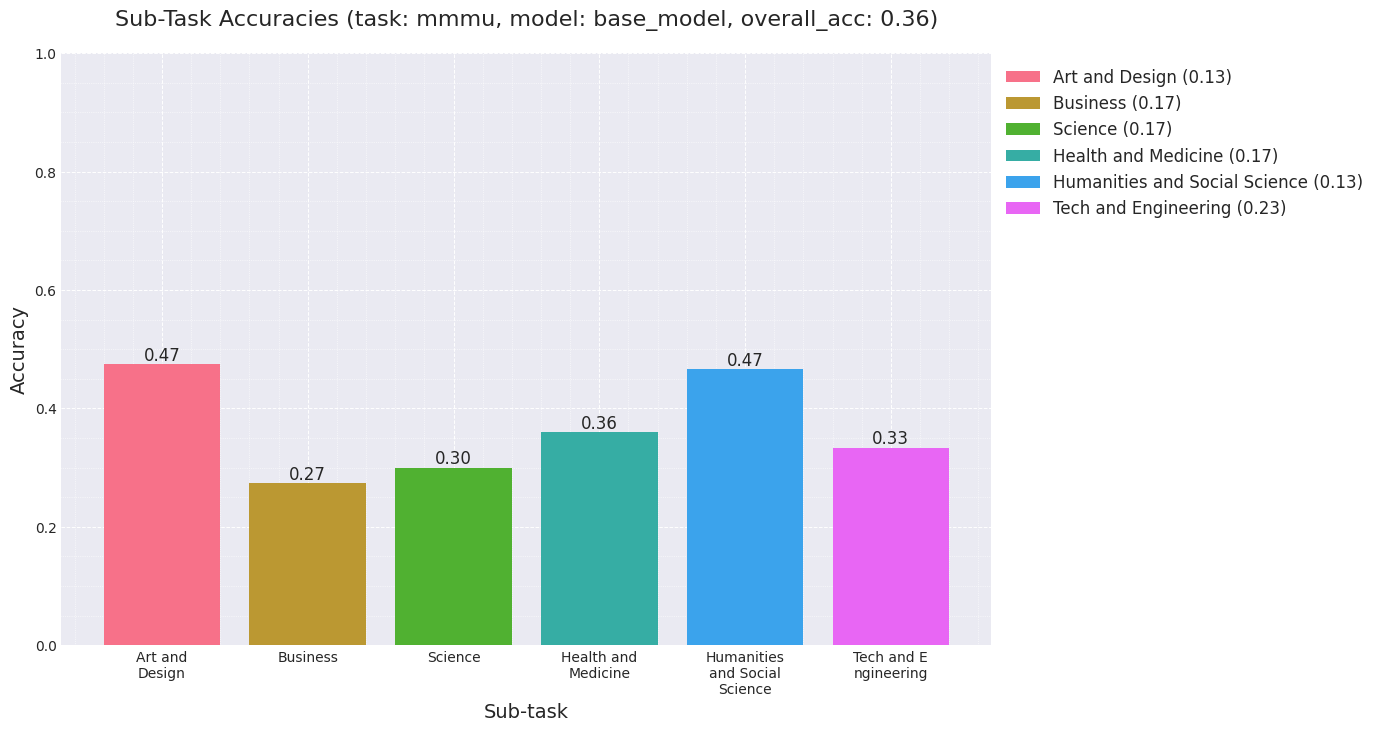

In [25]:
plot_sub_task_accuracies(results, -1)

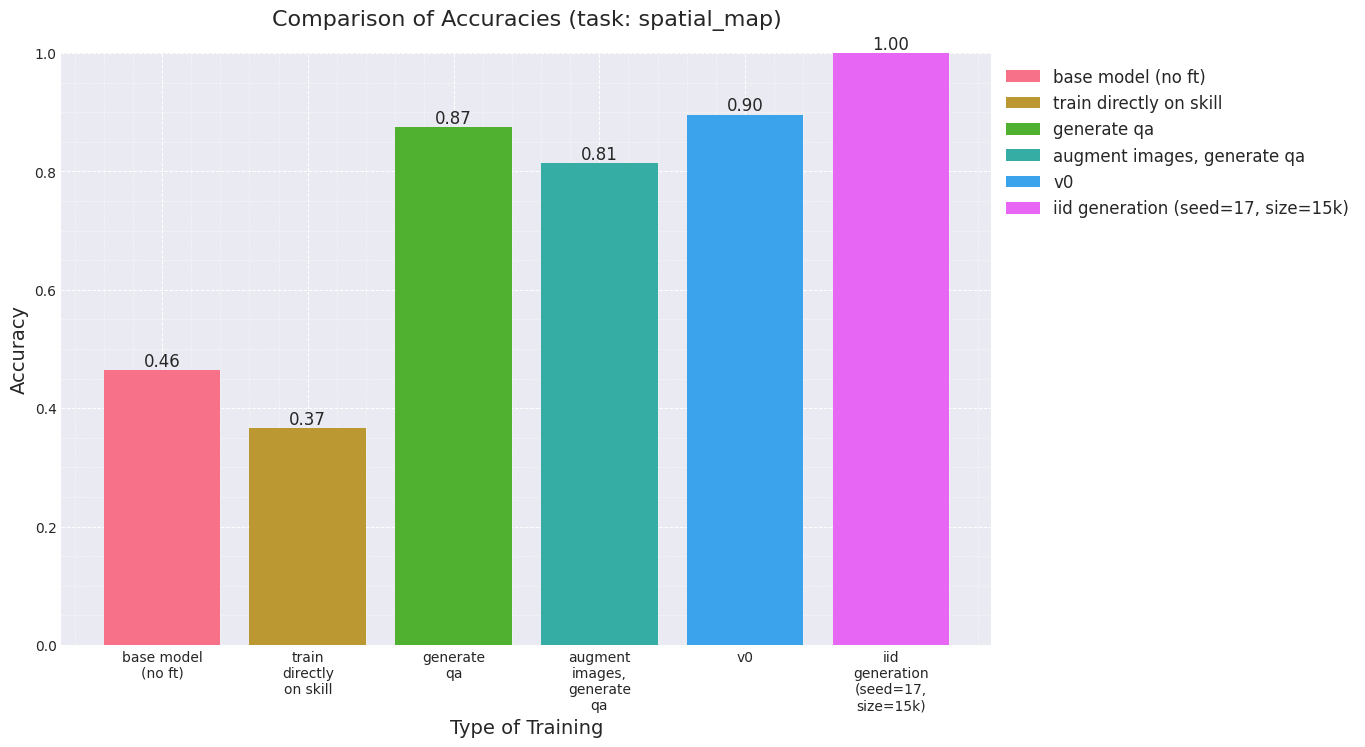

In [15]:
plot_accuracies(results, [28, -11, -9, -10, -7, -8])

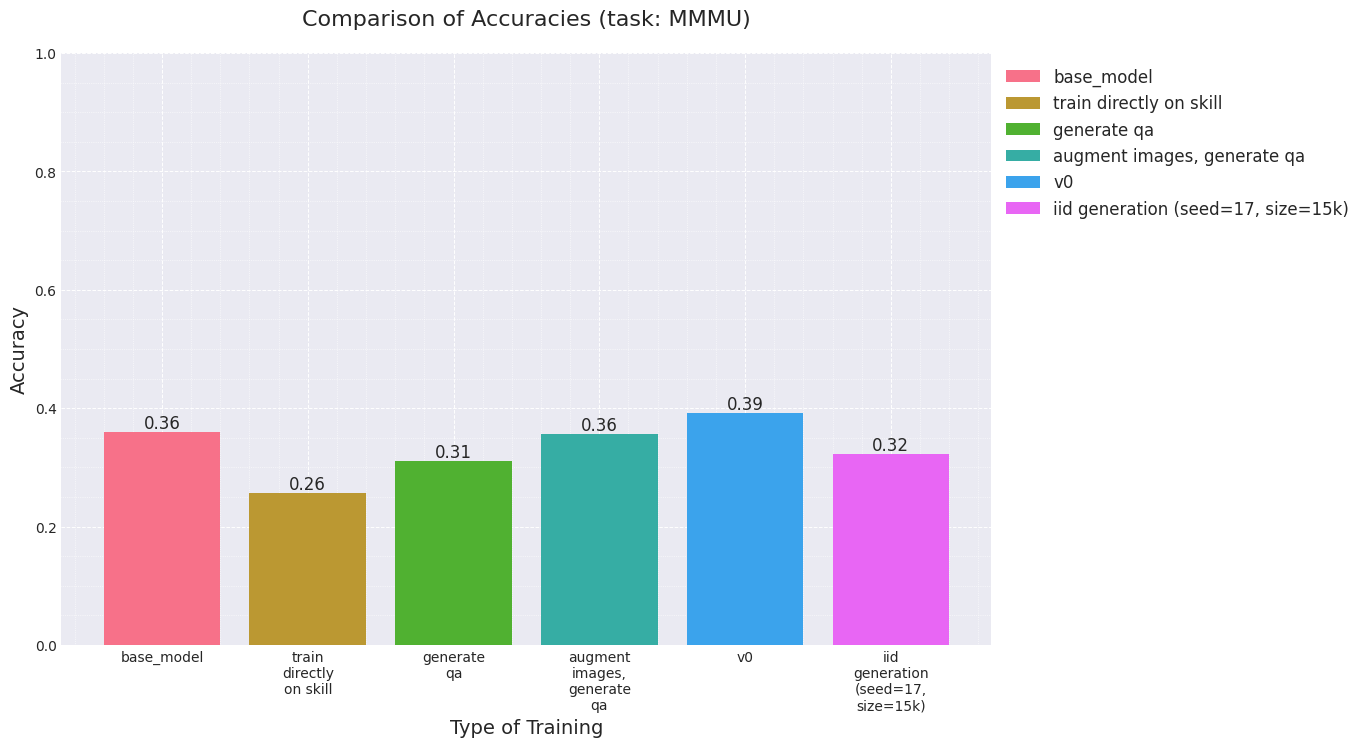

In [16]:
plot_accuracies(results, [-6, -3, -1, -2, -4, -5])

In [ ]:
# Example usage:
input_file_path = 'input_file.jsonl'  # Replace with your input JSONL file path
output_file_path = 'output_file.jsonl'  # Replace with your output JSONL file path

# Transform the JSONL file
transformed_list = parse_mmmu_results(input_file_path)

# Append the transformed objects to another JSONL file
append_to_jsonl_file(transformed_list, output_file_path)


# Visualize Model Diff 

In [16]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def categorize_parameters(param_names):
categories = []
    if False:
        
        for name in param_names:
            if "vision" in name and "img_projection" not in name:
                categories.append("vision")
            elif "img_projection" in name:
                categories.append("proj")
            else:
                categories.append("lm")
    return categories

def visualize_diffs_from_jsonl(jsonl_path, row_index=0, normalize=True):
    # Load the specified row from the JSONL file
    with open(jsonl_path, 'r') as f:
        lines = f.readlines()
        if row_index >= len(lines):
            raise IndexError(f"Row index {row_index} is out of range for file with {len(lines)} rows.")
        data = json.loads(lines[row_index])
    
    diffs = data["diffs"]
    param_names = [diff[0] for diff in diffs]
    abs_diffs = [diff[1] for diff in diffs]
    normalized_diffs = [diff[2] for diff in diffs]
    
    # Categorize parameters
    categories = categorize_parameters(param_names)
    
    # Convert categories to numeric labels for visualization
    category_map = {"vision": 0, "proj": 1, "lm": 2}
    category_labels = [category_map[cat] for cat in categories]

    # Create heatmaps
    abs_diffs_array = np.array(abs_diffs).reshape(1, -1)  # Reshape for heatmap
    normalized_diffs_array = np.array(normalized_diffs).reshape(1, -1)  # Reshape for heatmap
    category_array = np.array(category_labels).reshape(1, -1)  # Reshape for heatmap
    
    # Choose Diff Type
    diff_type = "Normalized"
    diffs_array = normalized_diffs_array
    if not normalize:
        diff_type = "Absolute"
        diffs_array = abs_diffs_array

    # Create masks for each category
    vision_mask = np.array([1 if cat == 0 else np.nan for cat in category_labels]).reshape(1, -1)
    proj_mask = np.array([1 if cat == 1 else np.nan for cat in category_labels]).reshape(1, -1)
    lm_mask = np.array([1 if cat == 2 else np.nan for cat in category_labels]).reshape(1, -1)

    fig, axs = plt.subplots(5, 1, figsize=(20, 18), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})
    
    # Differences Heatmap
    sns.heatmap(diffs_array, ax=axs[0], cmap='viridis', cbar_kws={'label': 'Absolute Difference'}, xticklabels=False)
    axs[0].set_title(f'{diff_type} Differences Heatmap\n(Model {data["model_id_1"]} vs {data["model_id_2"]})')
    axs[0].set_yticks([])
    
    
    # Parameter Categories Heatmap
    sns.heatmap(category_array, ax=axs[1], cmap='Set1', cbar=False, xticklabels=False)
    axs[1].set_title('Parameter Categories')
    axs[1].set_yticks([])
    
    # Vision Heatmap
    sns.heatmap(diffs_array * vision_mask, ax=axs[2], cmap='viridis', cbar_kws={'label': 'Absolute Difference (Vision)'}, xticklabels=False)
    axs[2].set_title(f'{diff_type} Differences Heatmap - Vision')
    axs[2].set_yticks([])
    
    # Projection Heatmap
    sns.heatmap(diffs_array * proj_mask, ax=axs[3], cmap='viridis', cbar_kws={'label': 'Absolute Difference (Proj)'}, xticklabels=False)
    axs[3].set_title(f'{diff_type} Differences Heatmap - Projection')
    axs[3].set_yticks([])
    
    # LM Heatmap
    sns.heatmap(diffs_array * lm_mask, ax=axs[4], cmap='viridis', cbar_kws={'label': 'Absolute Difference (LM)'}, xticklabels=False)
    axs[4].set_title(f'{diff_type} Differences Heatmap - LM')
    axs[4].set_yticks([])

    # Adjust layout to ensure all heatmaps have the same width
    max_width = diffs_array.shape[1]
    for ax in axs:
        ax.set_aspect('auto')
        ax.set_xlim(0, max_width)  # Set the same x limits to ensure uniform width

    # Add labels and ticks for categories
    unique_categories = list(category_map.keys())
    legend_labels = [plt.Line2D([0], [0], color=sns.color_palette('Set1')[category_map[cat]], lw=4) for cat in unique_categories]
    axs[2].legend(legend_labels, unique_categories, loc='upper right', title='Categories')

    # Add ticks for every 5 parameters
    tick_positions = np.arange(0, len(param_names), 5)
    tick_labels = np.arange(0, len(param_names), 5)
    for ax in axs:
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=90, fontsize=8)
    
    plt.tight_layout()
    plt.show()

/home/t-sijoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/t-sijoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/t-sijoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/t-sijoshi/miniconda3/envs/vlm/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


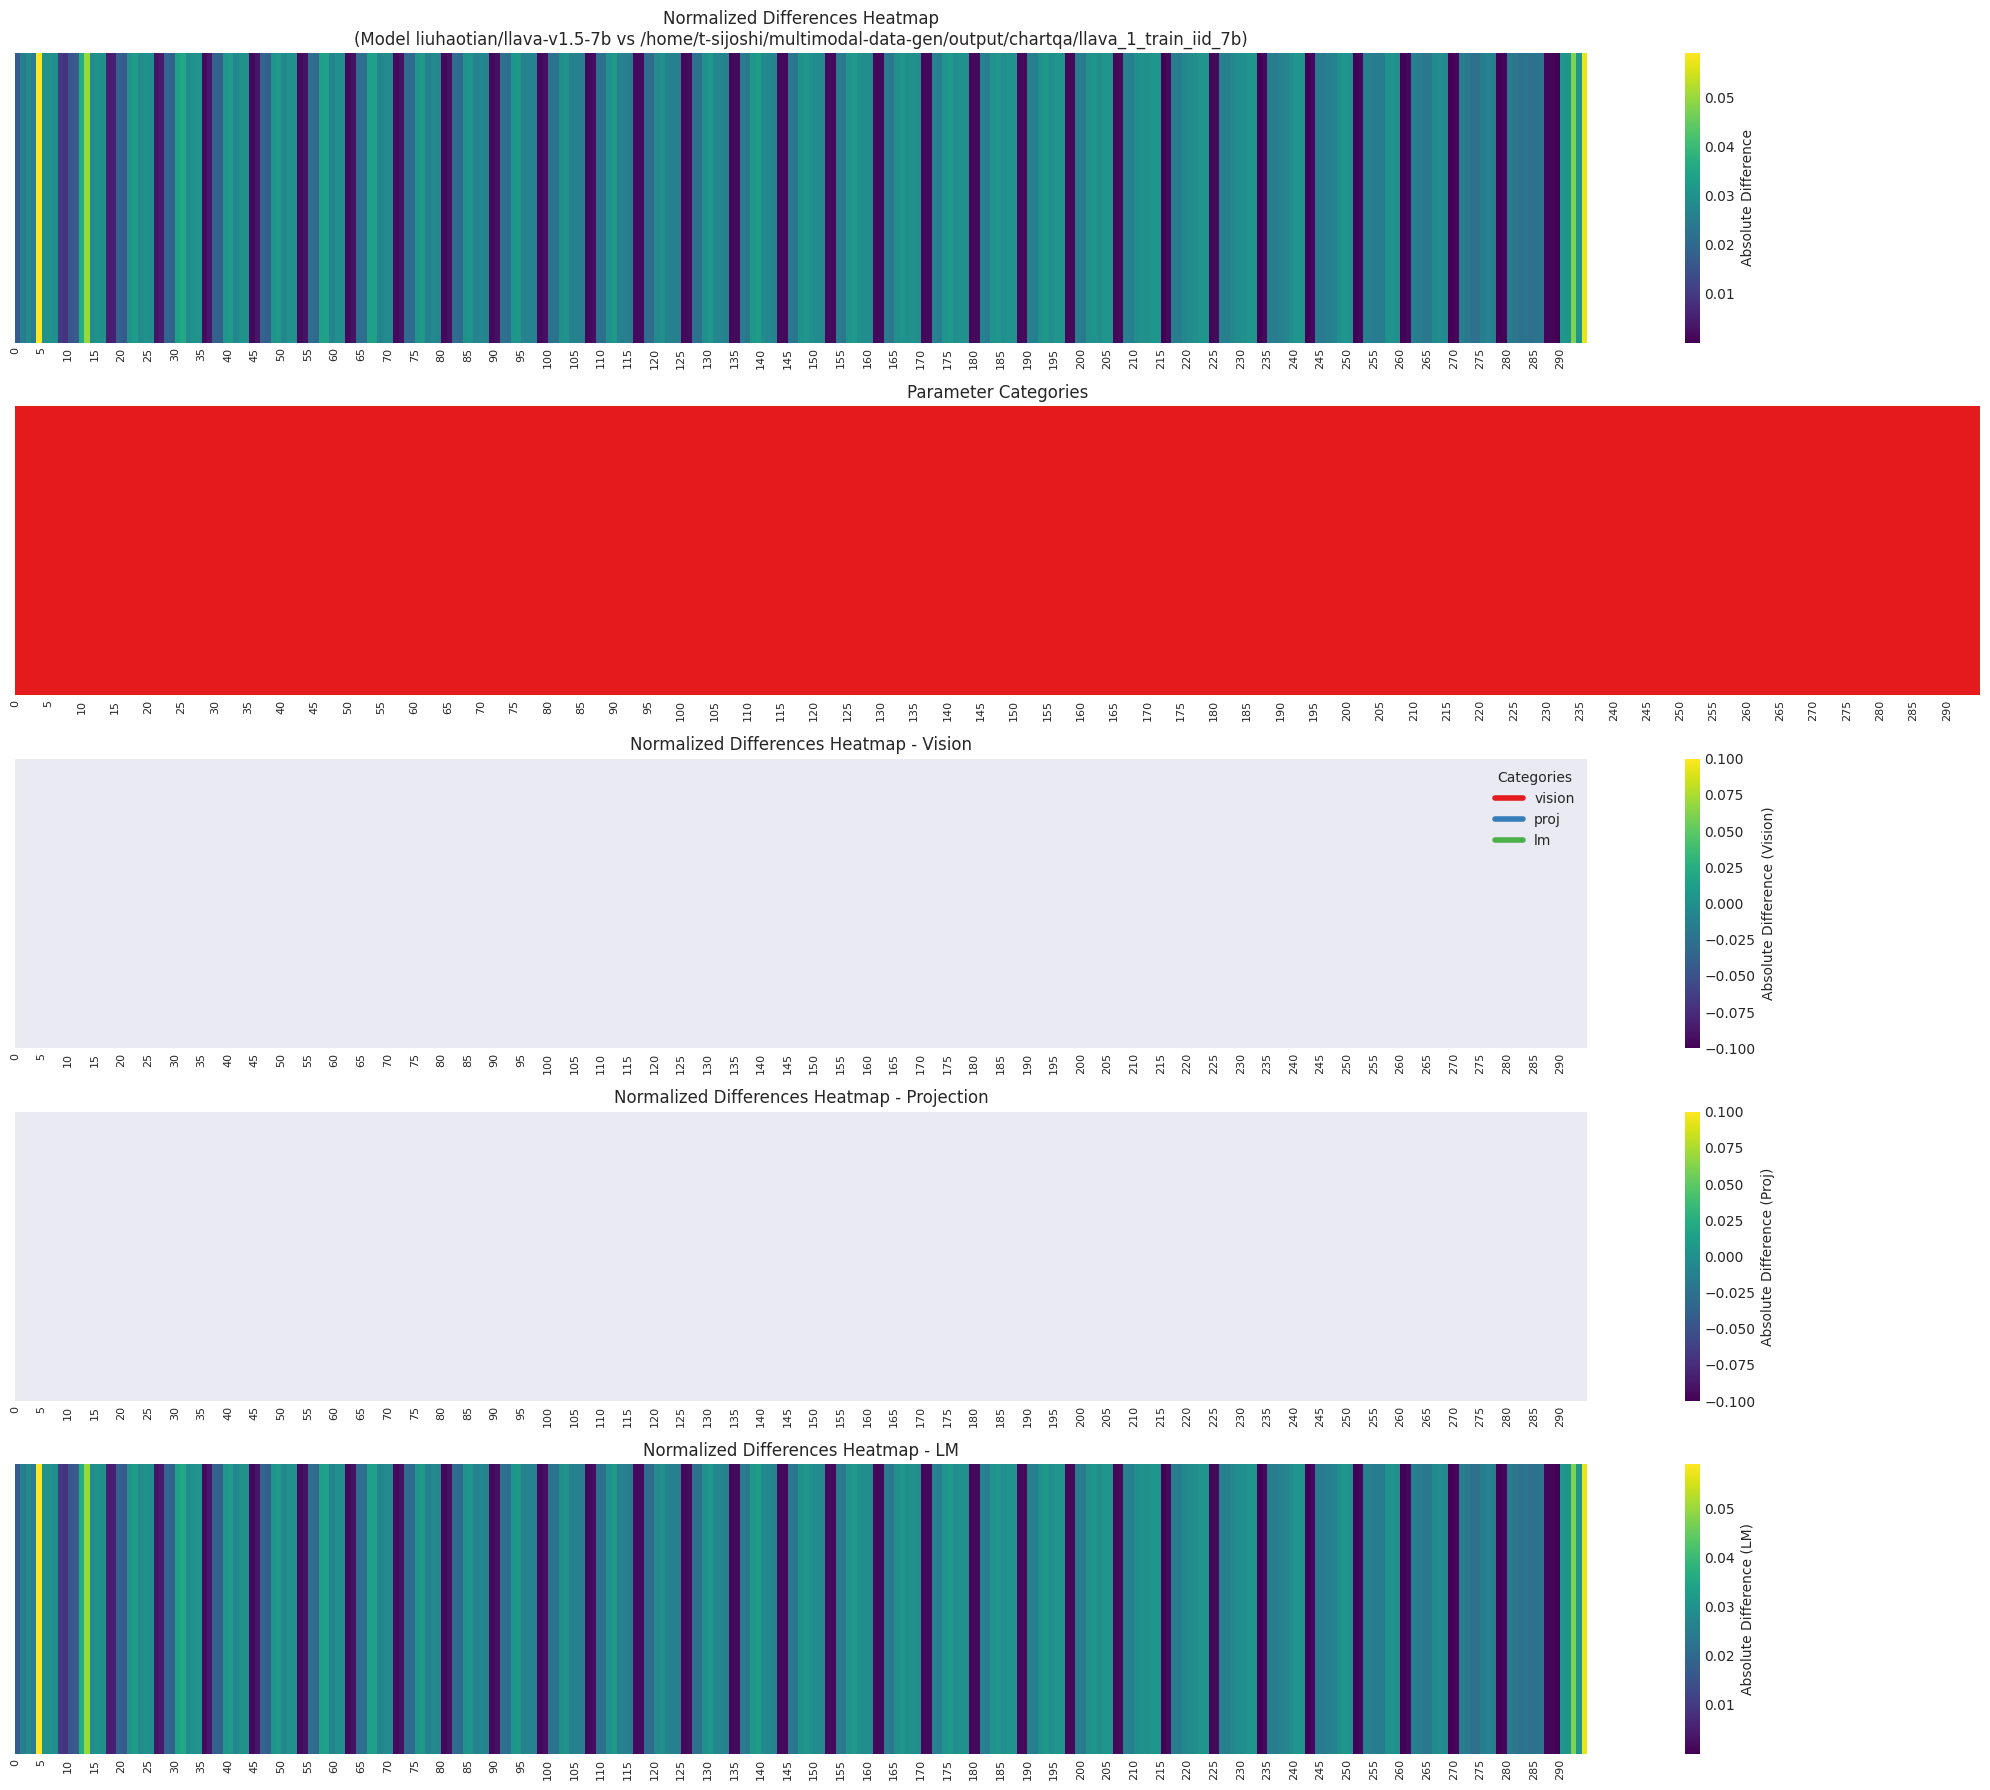

In [17]:
# Example usage
visualize_diffs_from_jsonl('/home/t-sijoshi/llava/model_diffs_sky.jsonl', row_index=0)